# Define the AM-FM sinusoid signal and plot it.

#### Zu-Cheng Chen, Feb 2019

In [1]:
# load packages
using PyPlot
#using Plots
using FFTW
using DSP
import LinearAlgebra: norm, reverse

## Define the AM-FM sinusoid signal.
The signal is  by
$$
s(t) = A \cos(2\pi f_1 t) \times \sin(2\pi f_0 t + b cos(2\pi f_1 t)),
$$
where $A$ is the $snr$.

In [2]:
"""
AMFMSinSig(dataT, snr, b, f0, f1) generates a AM-FM sinusoid signal S. 
dataT is the vector of time stamps at which the samples 
of the signal are to be computed. snr is the matched filtering 
signal-to-noise ratio of S, and [b, f0, f1] are three coefficients that 
parametrize the phase of the signal.
"""
function AMFMSinSig(dataT, snr::Real, b::Real, f0::Real, f1::Real)
    phaseVec01 = 2π*f1*dataT
    phaseVec02 = 2π*f0*dataT + b*cos.(2π*f1*dataT)
    sigVec = cos.(phaseVec01) .* sin.(phaseVec02)
    sigVec = snr*sigVec/norm(sigVec)
end

# test the function
AMFMSinSig(1, 1, 1, 1, 1), AMFMSinSig([1,2], 1, 1, 1, 1)

(1.0, [0.707107, 0.707107])

In [3]:
?AMFMSinSig

search: AMFMSinSig



AMFMSinSig(dataT, snr, b, f0, f1) generates a AM-FM sinusoid signal S.  dataT is the vector of time stamps at which the samples  of the signal are to be computed. snr is the matched filtering  signal-to-noise ratio of S, and [b, f0, f1] are three coefficients that  parametrize the phase of the signal.


## Plot the signal.

In [4]:
#Set signal parameters.
snr = 10;
b = 1;
f0 = 20;
f1 = 20;

In [5]:
#Instantaneous frequency after 1 sec.
maxFreq = max(2π*f1, 2π*f0 + b*cos(2π*f1));
samplFreq = 5*maxFreq;
samplIntrvl = 1/samplFreq;

In [6]:
#Time samples.
times = collect(0:samplIntrvl:1.0);

# Number of samples
nSamples = length(times);

# Generate the signal.
signals = AMFMSinSig(times, snr, b, f0, f1);

### Plot the signal.

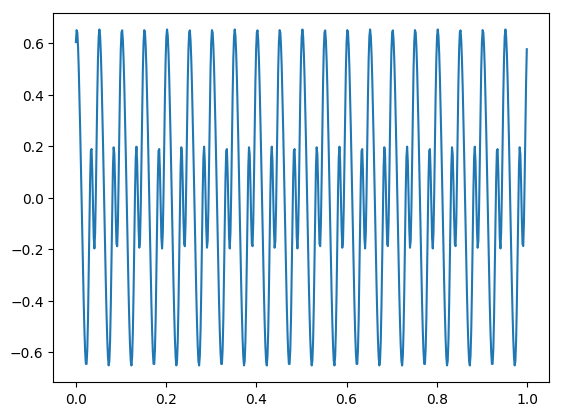

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f9035a49978>

In [7]:
plot(times,signals)

### Plot the periodogram.

In [8]:
# Length of data 
dataLen = times[end]-times[1]

# DFT sample corresponding to Nyquist frequency
kNyq = Int(floor(nSamples/2)+1)

# Positive Fourier frequencies
posFreq = (0:(kNyq-1))*(1/dataLen);

# FFT of signal
fftSig = fft(signals);

# Discard negative frequencies
fftSig = fftSig[1:kNyq];

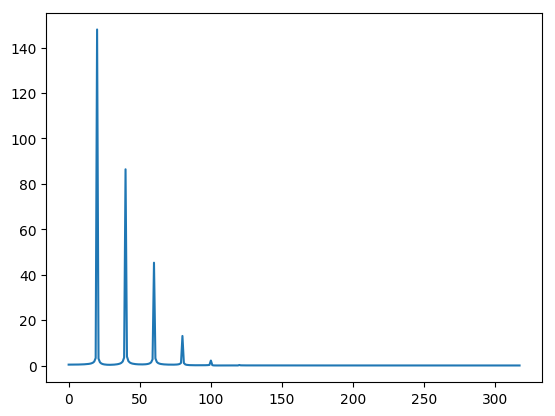

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f90081f9710>

In [9]:
# Plot periodogram
plot(posFreq,abs.(fftSig))

## Spectrogram

In [ ]:
sampFreq = 1024;
nSamples = 2048;
timeVec = (0:(nSamples-1))/sampFreq;
timeVec = collect(timeVec);

In [ ]:
AMFMSinSig(dataT, snr, b, f0, f1) 

In [ ]:
# Quadratic chirp signal
# Signal parameters
a1=10;
a2=3;
a3=10;
A = 10;
fs=sampFreq;

In [ ]:
# Generate signal
sigVec = crcbgenqcsig(timeVec,A,[a1,a2,a3]);

In [ ]:
# PyPlot includes a specgram function, but let's use the native implementation in DSP.jl
# The function below takes a spectrogram with standard parameters for speech (25ms Hanning windows/10ms overlap),
# plots it and returns the spectrogram in case we want to do something with it.

flipud(A) = reverse(A, dims = 1)

function plot_spectrogram(S::DSP.Periodograms.Spectrogram)
    t = time(S)
    f = freq(S)
    imshow(flipud(power(S)), extent=[first(f), last(f), first(t), last(t)], aspect="auto")
end

In [ ]:
# Make spectrogram with different time-frequency resolution
S = spectrogram(sigVec, 128, 127; fs=sampFreq);

plot_spectrogram(S)

In [ ]:
# Make spectrogram with different time-frequency resolution
S = spectrogram(sigVec, 256, 250; fs=sampFreq);

plot_spectrogram(S)